In [614]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [615]:
fish = pd.read_csv('../Data/fish.csv', usecols = [0, 1, 2])
fish

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [616]:
# two_fish = fish[(fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')]
# two_fish = two_fish.copy()

two_fish = fish[(fish['Species'] == 'Perch')]
two_fish = two_fish.copy()

In [617]:
fish_code_list = []

for i in two_fish['Species']:
    if i == 'Bream': fish_code_list.append(1)
    else: fish_code_list.append(2)

two_fish.loc[:, 'fish_code'] = fish_code_list

In [618]:
# feature = two_fish[['Weight', 'Length']]
# target = two_fish['fish_code']

feature = two_fish[['Length']]
target = two_fish['Weight']

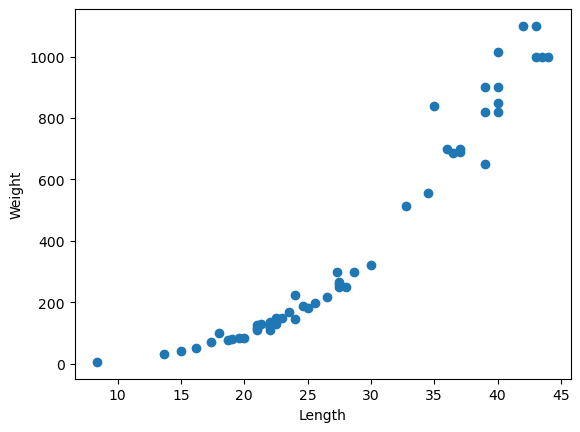

In [619]:
plt.scatter(two_fish['Length'], two_fish['Weight'])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [620]:
X_train, X_test, y_train, y_test = train_test_split(feature, target,
                                                    train_size = 0.8, random_state = 10)

In [621]:
print(f"X_train : {X_train.shape}, {X_train.ndim}D")
print(f"X_test : {X_test.shape}, {X_test.ndim}D")
print(f"y_train : {y_train.shape}, {y_train.ndim}D")
print(f"y_test : {X_test.shape}, {X_test.ndim}D")

X_train : (44, 1), 2D
X_test : (12, 1), 2D
y_train : (44,), 1D
y_test : (12, 1), 2D


In [622]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [623]:
print(f"훈련 세트 점수 : {model.score(X_train, y_train)}")
print(f"테스트 세트 점수 : {model.score(X_test, y_test)}")

훈련 세트 점수 : 0.9240032680854626
테스트 세트 점수 : 0.8386116153753965


In [624]:
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)

print(f"mse : {mse:.2f}")
print(f"rmse : {rmse:.2f}")
print(f"mae : {mae:.2f}")

mse : 10030.50
rmse : 100.15
mae : 73.46


In [625]:
model.coef_, model.intercept_

(array([37.07726677]), -645.2530112984248)

In [626]:
x = np.linspace(15, 45, 1000)
y = model.intercept_ + model.coef_[0]*x

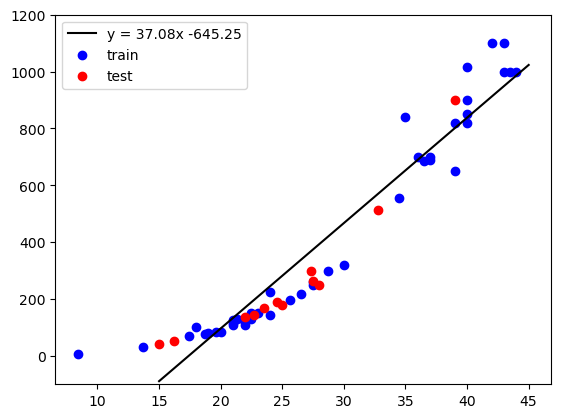

In [627]:
plt.plot(x, y, color = 'black', label = f"y = {model.coef_[0]:.2f}x {model.intercept_:.2f}")
plt.scatter(X_train, y_train, color = 'blue', label = 'train')
plt.scatter(X_test, y_test, color = 'red', label = 'test')
plt.ylim(-100,1200)
plt.legend()
plt.show()

In [628]:
X_train_poly = np.column_stack((X_train ** 2, X_train))
X_test_poly = np.column_stack((X_test ** 2, X_test))

In [629]:
print(X_train_poly.shape, X_test_poly.shape)

(44, 2) (12, 2)


In [630]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [631]:
print(model.coef_, model.intercept_)

[  0.98621387 -20.59306723] 109.94532334020465


In [632]:
model.score(X_train_poly, y_train), model.score(X_test_poly, y_test)

(0.971115050581039, 0.9759141253594013)

In [633]:
x = np.linspace(10, 45, 1000)
y = model.coef_[0]*(x**2) + model.coef_[1]*x + model.intercept_ 

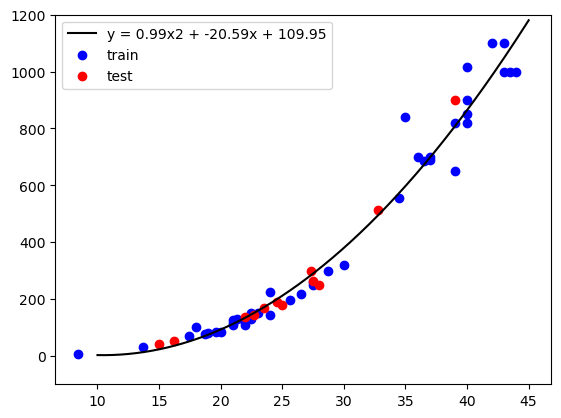

In [634]:
plt.plot(x, y, color = 'black', label = f"y = {model.coef_[0]:.2f}x2 + {model.coef_[1]:.2f}x + {model.intercept_:.2f}")
plt.scatter(X_train, y_train, color = 'blue', label = 'train')
plt.scatter(X_test, y_test, color = 'red', label = 'test')
plt.ylim(-100,1200)
plt.legend()
plt.show()

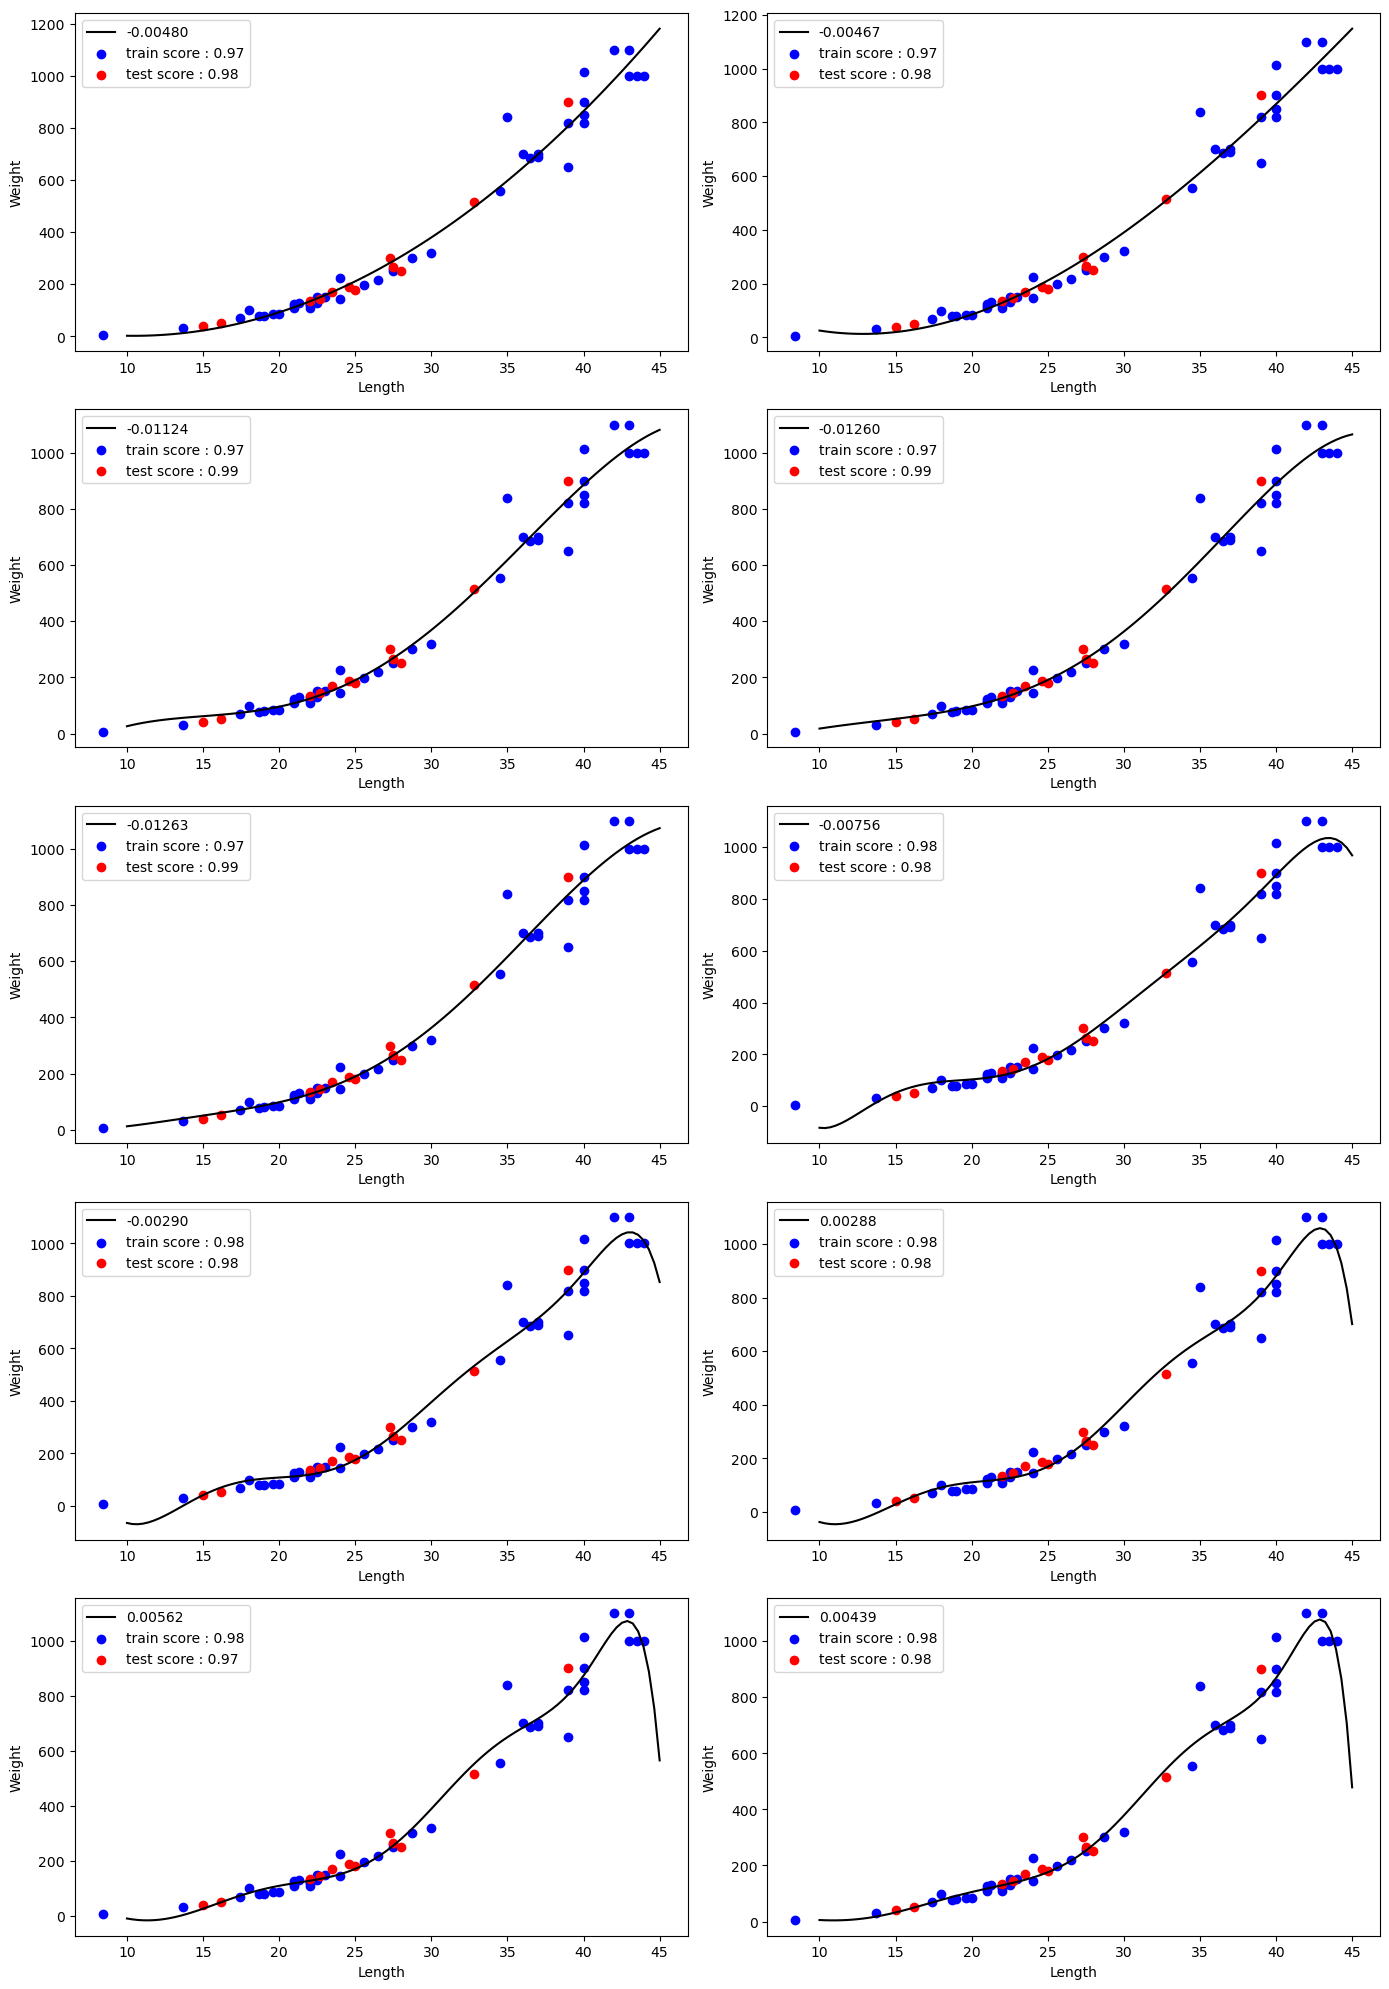

In [663]:
degree_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

fig, axs = plt.subplots(5, 2, figsize = (14, 20))

for a in range(5):
    for b in range(2):

        poly = PolynomialFeatures(degree = degree_list[a*2 + b], include_bias=False)
        poly.fit(X_train)

        X_train_poly = poly.transform(X_train)
        X_test_poly = poly.transform(X_test)

        linear_model = LinearRegression()

        linear_model.fit(X_train_poly, y_train)

        x = np.linspace(10, 45, 100)

        y = linear_model.intercept_
        for j in range(len(linear_model.coef_)):
            y += (x**(j+1))*linear_model.coef_[j]


        axs[a][b].plot(x, y, color = 'black',
                       label = f'{(linear_model.score(X_train_poly, y_train)-linear_model.score(X_test_poly, y_test)):.5f}')
        axs[a][b].scatter(X_train, y_train, color = 'blue',
                    label = f'train score : {linear_model.score(X_train_poly, y_train):.2f}')
        axs[a][b].scatter(X_test, y_test, color = 'red',
                    label = f'test score : {linear_model.score(X_test_poly, y_test):.2f}')
        axs[a][b].set_xlabel('Length')
        axs[a][b].set_ylabel('Weight')
        # axs[i].ylim(-100,1200)
        axs[a][b].legend()

plt.tight_layout()
plt.show()